# Attention !!! Please write or take a screenshot of all answers in the pdf file. You won't be graded if there is no pdf file in the submission.

# Problem 1: MLE

Consider the following very simple model for stock pricing.  The price at the end of each day is the price of the previous day multiplied by a fixed, but unknown, rate of return, $\alpha$, with some noise, $w$. For a two-day period, we can observe the following Markov process: $P(y_2, y_1, y_0 | \alpha) = P(y_2|y_1)P(y_1|y_0)P(y_0 |\alpha)$ where $ y_2 \sim \mathcal{N}(\alpha y_1, \sigma^2), y_1 \sim \mathcal{N}(\alpha y_0, \sigma^2), y_0 \sim \mathcal{N}(0,\lambda)$ 

1. Find the MLE of the rate of return, $\alpha$, given the observed price at the end of each day $y_2,y_1,y_0$.  In other words, compute for the value of $\alpha$ that maximizes $P(y_2,y_1,y_0|\alpha)$.

##### **Solve**

Given $P(y_2, y_1, y_0 | \alpha) = P(y_2|y_1)P(y_1|y_0)P(y_0 |\alpha)$ where $ y_2 \sim \mathcal{N}(\alpha y_1, \sigma^2), y_1 \sim \mathcal{N}(\alpha y_0, \sigma^2), y_0 \sim \mathcal{N}(0,\lambda)$,

We could defined the likelihood of $P(y_2, y_1, y_0 | \alpha)$ as

$P(y_2, y_1, y_0 | \alpha) = (\frac{1}{\sigma \sqrt{2\pi}})^3
exp( -\frac{1}{2}( \frac{y_2 - \alpha y_1}{\sigma})^2 )
exp( -\frac{1}{2}( \frac{y_1 - \alpha y_0}{\sigma})^2 )
exp( -\frac{1}{2}( \frac{y_0}{\sqrt{\lambda}})^{^2} )$ 

We want to maximize the likelihood function w.r.t $\alpha$.

$\frac{\partial}{\partial \alpha} P(y_2, y_1, y_0 | \alpha) = 0$

which is equal to

$\frac{\partial}{\partial \alpha} \log P(y_2, y_1, y_0 | \alpha) = 0$

$\frac{\partial}{\partial \alpha} [-3\log(\sigma \sqrt{2\pi})] 
- \frac{\partial}{\partial \alpha}\frac{1}{2}(\frac{y_2 - \alpha y_1} {\sigma})^2  
- \frac{\partial}{\partial \alpha}\frac{1}{2}(\frac{y_1 - \alpha y_0} {\sigma})^2 
- \frac{\partial}{\partial \alpha}\frac{1}{2}(\frac{y_0} {\sqrt{\lambda}})^2= 0$


$ 0 + (\frac{y_2 - \alpha y_1}{\sigma}) (\frac{-y_1} {\sigma}) + 
(\frac{y_1 - \alpha y_0}{\sigma}) (\frac{-y_0} {\sigma}) + 0 = 0$


$ -y_1y_2 + \alpha y_1^2 - y_1y_0 + \alpha y_0^2 = 0$, where $\sigma \neq 0$

$ \alpha (y_0^2+y_1^2) = y_1y_2 + y_1y_0$

Thus, we've got

$ \alpha = \frac{y_1y_2 + y_1y_0}{y_0^2+y_1^2}$, where $\sigma \neq 0, y_0^2+y_1^2 \neq 0$

# Problem 2: Hamtaro and his entertainment


From the previous assignment, you might wondering why Hamtaro trying to build a cloud services. Hamtaro has his own entertainment website, Hamhub, which needs services from the cloud provider.
He monitors the amount of visitors everyday.
Last Monday, the most famous website in this field of entertainment was also blocked by the government in the same day. Does the blocking has a significant effect on number of Hamhub's visitors ?
*   Before last Monday, the average number of visitors was $x_0 \sim \mathcal{N}(10000, \sigma^2)$.
*   After last Monday, Hamtaro spend 10 days collecting the amount of users.
```
X1 = array([10190.25479236, 10082.65748517, 10161.37971691, 10042.27783459,
       10129.73858138,  9962.73586162, 10187.78833611, 10013.48007958,
       10372.98760763, 10238.55408072])
```
1. Can Hamtaro conclude that the blocking significantly increase the number of visitors with significant level of 0.001?
2. If the sample mean and variance hold the same, what is the minimum number of sample Hamtaro need to reject the null hypothesis ?

#### solve

In [ ]:
import numpy as np
from scipy.stats import t

X1 = np.array([10190.25479236, 10082.65748517, 10161.37971691, 10042.27783459,
       10129.73858138,  9962.73586162, 10187.78833611, 10013.48007958,
       10372.98760763, 10238.55408072])

In [ ]:
# P2 - 1
from scipy.stats import ttest_1samp

# We do standard one-sample t-test for comparing between mean of X1 and mean of X0.
# The null hypothesis is : mean(X0) >= mean(X1)
# The alternative hypothesis is : mean(X0) < mean(X1)

# Scipy library
t_val, two_sided_pval = ttest_1samp(X1, 10000)
N=10
one_sided_pval = two_sided_pval/2
print(t_val, one_sided_pval)

# Manual
std = np.sqrt( ((X1 - X1.mean())**2).sum() / (N-1) )
t_val = (X1.mean() - 10000) / (std / np.sqrt(N))
sig_lvl = (1-t.cdf(t_val, N-1))
print(t_val, sig_lvl)
assert two_sided_pval/2 - sig_lvl < 1e-7


# No. Hamtaro got the p-value of 0.0026 > 0.001. Thus, he cannot reject the null hypothesis.

3.641470691529548 0.0026942708869087556
3.641470691529548 0.0026942708869087673


In [ ]:
# P2 - 2
# If the mean and the std remain the same even we incrase the sample size,
# the statistical value (t_val) will depends on the sample size only.
constant_mean = X1.mean()
constant_std = std

for N in range(10, 100): # Try increasing number of samples
  t_val = (constant_mean - 10000) / (constant_std / np.sqrt(N))
  sig_lvl = (1-t.cdf(t_val, N-1))
  if sig_lvl <= 0.001:
    print("Sample size of {} yields the p-value of {}".format(N, sig_lvl))
    break

Sample size of 13 yields the p-value of 0.0006709977698478031


# Problem 3: T-Test

Hamtaro perform a t-test for the null hypothesis $H_0: \mu=10$ at significance level $\alpha=0.05$ by means of a dataset consisting of $n=16$ elements with sample mean $11$ and sample variance $4$.
1. Should we reject the null hypothesis in favor of $H_a: \mu \neq 10$
2. What if we test against $H_{a^{'}}: \mu >10$ ?

#### Solve

In [ ]:
# P3 - 1
N=16
sample_mean = 11
sample_std = 4**0.5
population_mean = 10

t_val = ( sample_mean - population_mean) / (sample_std / np.sqrt(N))
one_sided_sig_lvl = (1-t.cdf(t_val, N-1) )
two_sided_sig_lvl = one_sided_sig_lvl * 2

Ans = """
P-value: {} > 0.05
Hamtaro should not reject the null hypothesis since the pvalue obtained from the data is too low.
""".format(
    two_sided_sig_lvl
)

print(Ans.strip())


P-value: 0.06394500728472008 > 0.05
Hamtaro should not reject the null hypothesis since the pvalue obtained from the data is too low.


In [ ]:
Ans = """
If we test against `greater' assumption, we've got the significant level of {} < 0.05.
So, Hamtaro can reject the null hypothesis.
""".format(
    one_sided_sig_lvl
)

print(Ans.strip())

If we test against `greater' assumption, we've got the significant level of 0.03197250364236004 < 0.05.
So, Hamtaro can reject the null hypothesis.


# Problem 4: Hamtaro and his entertainment - 2

There is a parallel world of developing Hamhub.
Last Monday, Hamtaro added the new channel to the website and he wanted to know how much does it affects the amount of visitors. However, the most famous website in this field of entertainment was also blocked by the government in the same day. Since there is no sign of unblocking from the goverment, Hamtaro is not able to do a hypothesis testing on only the factor of adding the new channel. How could Hamtaro know that the changes from adding the channel is significant ?

There are four scenarios in this problem,
1.   Before the last Monday, the average number of visitors was $x_0 \sim \mathcal{N}(\mu_0, \sigma^2)$ (no block + no new channel).
2.  After the last Monday, the average number of visitors are $x_1 \sim \mathcal{N}(\mu_1, \sigma^2)$ (block + new channel).
3.  Days after removing the channel, the average number of visitors are $x_2 \sim \mathcal{N}(\mu_2, \sigma^2)$ (block + no new channel).
4.  In an imaginating scenario that the new channel is added but the most famous website haven't been blocked, the average number of visitors are $x_3 \sim \mathcal{N}(\mu_3, \sigma_3^2)$ (no block + new channel).

Assume that a user decide to visit 
the website because of goverment blocking, a new channel, or none of the twos (independent).

1. Hamtaro found the p-value of 0.03 from doing a t-test on $H_a:x_1 > x_0$. Can he conclude that adding the new channel significantly increase the number of visitors ? Justify your answer.
2. Hamtaro did another t-test and found the p-value of 0.1 from testing $H_a: x_1 > x_2$. Does he has an additional information to answer the distribution of $x_3$ ?
3. Does the current setups, 1. and 2., lead to the final question about significant of adding the new channel ?
  * If yes, what should you do next to get the final answer ?
  * If no, Can we use the hypothesis testing answer to solve this problem ?
    * If yes, design your own testing, describe assumptions you made.
    * If no, explain why.

#### solve

In [ ]:
# 1. No, Though the difference may significant, either blocking website and adding channel can affects the difference.
# Hamtaro cannot conclude which one incrases view significantly from the experiment in 1.

# 2. Since 0.1 is lower than the common significant level, which usually less than 0.05, Hamtaro may not reject the null hypothesis.
# Thus, he cannot conclude that adding a new channel significantly increases the number of visitors if another site is already blocked.

# 3. We know that
#   - Adding channels and blocking sites affect the number of visitor independently
#   - The number of visitors increases significantly after blocking sites and adding channels
#   - Removing a channel does not significantly change the number of visitors
# Unless we use the larger significant level for 2., we have to conclude that adding a new channel probably does not significantly affect the number of visitor.

# Problem 5: Hamtaro and his casino

After openning Hamhub for a while, Hamtaro website is also banned by the government since there are some bad uploaded videos.
By the way, Hamtaro love gambling. He often practice his skills on public gambling websites which can be easily found even if they are illegal.
After being a player for a while, Hamtaro see a chance in gambling business since the risk of banning gambling website is much lower than his previous entertainment business. Thus, he decide to open his own online casino.

At the openning date, he will deploy only the game of rolling dice first.
The rule is simple. A player select a number and will win the prize if he can roll it. 
Hamtaro want to maximize his profit by providing a biased-dice to the player.
Since it is a online casio, Hamtaro can alter the biasness of the dice after the player select a number.
However, if the dice is too bias he will be caught.

As a player,
1. Formulate the null hypothesis $H_0$ and alternative hypothesys $H_a$ to investigate the biasness of the dice. 
2. Should the $H_a$ be one-sided or two-sided ? What are differences and benefits over another in this problem ?
3. The player found the selected number is rolled out 3 out of 30 attempts. If he want no more than $10\%$ of type-I error, can he reject the $H_0$ ? Justify your answer.
4. If the player play 200 games, what is the rejection region if he wants no more than $10\%$ type-I error?
5. What would be the result in 4. if the true distribution is approximated by the normal distribution ?

On Hamtaro side,
6. The master mind Hamtaro observed that usual players will play no more than 200 games a day. Since doesn't want to be caught by the significant level of $0.01$, he accept the strategy if the probability of being caught is less than $0.05$. What should be the lowest probability of rolling the target number ? Answer in floating number with the precision of 3.
7. What if Hamtaro accept the strategy that the probability of being caught is less than $0.01$ ? Answer in floating number with the precision of 5.


#### Solve

In [ ]:
# P1 H0: the selected number should be rolled out one if for six turns.
#    H0: N_s = N/6, where N = sum_{i=1 to 6} N_i
#    Ha: N_s != N/6
# P2 For the correctness, it should be two sides.
#    However, one-sided testing is also fine becuase you'll be exploited only if N_2 < N/6.
#    From now on, we will use Ha: N_s < N/6 as we don't care the correctness if we're winning.

# P3
from scipy.stats import binom, norm
N = 30
p = 1/6
N_s = 3
sig_lvl = 0.1 # type-I eror, there is 10% chance of rejecting H0 given it is true

print("n={} p={:.3f}; P(X <= {}) = {}".format(N, p, N_s, binom.cdf(N_s, N, p)))
# P(X <= 3) > sig_lvl
# There is not enough evidence to reject H0, using the significant level of 0.1.

n=30 p=0.167; P(X <= 3) = 0.23961952685801283


In [ ]:
# P4
N = 200
p=1/6
sig_lvl = 0.1 # type-I eror, there is 10% chance of rejecting H0 given it is true

# bruteforce, find the largest N_s that P(Ns <= N) <= 0.1
for N_s in range(50):
  cdf = binom.cdf(N_s, N, p)
  if (cdf  >= sig_lvl):
    crit_value=N_s - 1
    p_value=cdf
    break

print("crit_value = {}".format(crit_value))
print("n={} p={:.5f}; P(X <= {}) = {}".format(N, p, crit_value, binom.cdf(crit_value, N, p)))

crit_value = 26
n=200 p=0.16667; P(X <= 26) = 0.09453848341112787


In [ ]:
# P5
N = 200
p=1/6
sig_lvl = 0.1 # type-I eror, there is 10% chance of rejecting H0 given it is true

# approximate binom using normal
# https://en.wikipedia.org/wiki/Binomial_distribution#Normal_approximation
mu = N*p
std = (N*p*(1-p))**0.5

# bruteforce, find the largest N_s that P(Ns <= N) <= 0.1
for N_s in range(50):
  cdf = norm.cdf(N_s, mu, std)
  if (cdf  >= sig_lvl):
    crit_value=N_s - 1
    p_value=cdf
    break

print("crit_value = {}".format(crit_value))
print("n={} p={:.5f}; P(X <= {}) = {}".format(N, p, crit_value, binom.cdf(crit_value, N, p)))

crit_value = 26
n=200 p=0.16667; P(X <= 26) = 0.09453848341112787


In [ ]:
# P6
p=1/6
N=200
sig_lvl = 0.01
accept_thres = 0.05

# The player should found his selected number in more than `crit_value` games if he play N games
# and use the significant level of `sig_lvl`.
crit_value = binom.ppf(sig_lvl, N, p)
if binom.cdf(crit_value, N, p) > sig_lvl:
  crit_value -= 1 # minus 1 as we do not want to exceed sig_lvl

print("Fair dice")
print("n={} p={:.3f}; P(X <= {}) = {:.3f}".format(N, p, crit_value, binom.cdf(crit_value, N, p)))
print("Bias dice")
# iteratively decreases p by 0.001
for p_candidate in range(10,20):
  bias_p = round(1/6,3) - p_candidate/1000
  cdf = binom.cdf(crit_value, N, bias_p)
  print("n={} p={:.3f}; P(X <= {}) = {:.3f}".format(N, bias_p, crit_value, cdf))
  if (cdf > accept_thres):
    break

print("The biased probability should greater than {:.3f} in order to have the chance of being caught less than {}.".format(bias_p + 0.001, accept_thres))

Fair dice
n=200 p=0.167; P(X <= 21.0) = 0.009
Bias dice
n=200 p=0.157; P(X <= 21.0) = 0.023
n=200 p=0.156; P(X <= 21.0) = 0.025
n=200 p=0.155; P(X <= 21.0) = 0.027
n=200 p=0.154; P(X <= 21.0) = 0.030
n=200 p=0.153; P(X <= 21.0) = 0.032
n=200 p=0.152; P(X <= 21.0) = 0.035
n=200 p=0.151; P(X <= 21.0) = 0.038
n=200 p=0.150; P(X <= 21.0) = 0.041
n=200 p=0.149; P(X <= 21.0) = 0.045
n=200 p=0.148; P(X <= 21.0) = 0.049
The biased probability should greater than 0.149 in order to have the chance of being caught less than 0.05.


In [ ]:
# P7

p=1/6
N=200
sig_lvl = 0.01
accept_thres = 0.01

# The plaer shuold found his selected number in more than `crit_value` games if he play N games
# and use the significant level of `sig_lvl`.
crit_value = binom.ppf(sig_lvl, N, p)
if binom.cdf(crit_value, N, p) > sig_lvl:
  crit_value -= 1 # minus 1 as we do not want to exceed sig_lvl

print("Fair dice")
print("n={} p={:.5f}; P(X <= {}) = {:.5f}".format(N, p, crit_value, binom.cdf(crit_value, N, p)))
print("Bias dice")
# iteratively decreases p by 0.00001
for p_candidate in range(1,100):
  bias_p = round(1/6,5) - p_candidate/100000
  cdf = binom.cdf(crit_value, N, bias_p)
  print("n={} p={:.5f}; P(X <= {}) = {:.5f}".format(N, bias_p, crit_value, cdf))
  if (cdf > accept_thres):
    break

print("The biased probability should greater than {:.5f} in order to have the chance of being caught less than {}.".format(bias_p + 0.00001, accept_thres))

Fair dice
n=200 p=0.16667; P(X <= 21.0) = 0.00940
Bias dice
n=200 p=0.16666; P(X <= 21.0) = 0.00940
n=200 p=0.16665; P(X <= 21.0) = 0.00941
n=200 p=0.16664; P(X <= 21.0) = 0.00942
n=200 p=0.16663; P(X <= 21.0) = 0.00943
n=200 p=0.16662; P(X <= 21.0) = 0.00944
n=200 p=0.16661; P(X <= 21.0) = 0.00945
n=200 p=0.16660; P(X <= 21.0) = 0.00946
n=200 p=0.16659; P(X <= 21.0) = 0.00947
n=200 p=0.16658; P(X <= 21.0) = 0.00947
n=200 p=0.16657; P(X <= 21.0) = 0.00948
n=200 p=0.16656; P(X <= 21.0) = 0.00949
n=200 p=0.16655; P(X <= 21.0) = 0.00950
n=200 p=0.16654; P(X <= 21.0) = 0.00951
n=200 p=0.16653; P(X <= 21.0) = 0.00952
n=200 p=0.16652; P(X <= 21.0) = 0.00953
n=200 p=0.16651; P(X <= 21.0) = 0.00954
n=200 p=0.16650; P(X <= 21.0) = 0.00955
n=200 p=0.16649; P(X <= 21.0) = 0.00956
n=200 p=0.16648; P(X <= 21.0) = 0.00957
n=200 p=0.16647; P(X <= 21.0) = 0.00958
n=200 p=0.16646; P(X <= 21.0) = 0.00958
n=200 p=0.16645; P(X <= 21.0) = 0.00959
n=200 p=0.16644; P(X <= 21.0) = 0.00960
n=200 p=0.16643; P(X

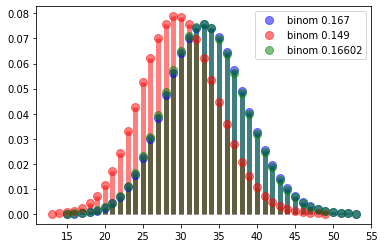

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n=200
p=1/6
fig, ax = plt.subplots(1, 1)

x1 = np.arange(binom.ppf(0.0001, n, p),
              binom.ppf(0.9999, n, p))
ax.plot(x1, binom.pmf(x1, n, p), 'bo', ms=8, label='binom 0.167', alpha=0.5)
ax.vlines(x1, 0, binom.pmf(x1, n, p), colors='b', lw=5, alpha=0.5)

x2 = np.arange(binom.ppf(0.0001, n, 0.149),
              binom.ppf(0.9999, n, 0.149))
ax.plot(x2, binom.pmf(x2, n, 0.149), 'ro', ms=8, label='binom 0.149', alpha=0.5)
ax.vlines(x2, 0, binom.pmf(x2, n, 0.149), colors='r', lw=5, alpha=0.5)

x3 = np.arange(binom.ppf(0.0001, n, 0.16602),
              binom.ppf(0.9999, n, 0.16602))
ax.plot(x3, binom.pmf(x3, n, 0.16602), 'go', ms=8, label='binom 0.16602', alpha=0.5)
ax.vlines(x3, 0, binom.pmf(x3, n, 0.16602), colors='g', lw=5, alpha=0.5)


plt.legend()
plt.show()

# Problem 6: Hamtaro and the new AC company



As you remember that Hamtaro tried to control the temperature of cloud storage room to make the failure rate of storage disks as low as possible. 
This year, a new company said that they has a better AC system, which could provides more stable room temperature.

The company send historical temperature of the room with a new AC, which has the target temperature of 15, to Hamtaro. 
Given that Hamtaro's existing AC provides the room temperature of $t \sim \mathcal{N}(15, 0.5^2)$.

**TODO:6**
1. Help Hamtaro formulate the null hypothesis and alternative hypotheses for detemining whether the new AC is better than the existing one or not. List your assumptions that are required to make this experiment possible. 
2. Can you decide which AC system is better ? Justify your answer.


In [ ]:
import numpy as np
temp_log = np.array([14.66017243, 14.82134507, 14.75354867, 15.02847413, 15.96338554,
       15.46598137, 15.35605532, 14.91048177, 15.13237189, 14.38789873,
       15.76833691, 14.85383663, 15.28335022, 15.06718901, 15.44364169,
       14.29511914, 15.13458572, 14.57428013, 15.14885716, 14.08580661,
       15.6006654 , 14.98109974, 14.95059512, 14.91460432, 14.68809902,
       15.4988617 , 14.99646465, 15.00654947, 14.65024467, 15.20684546,
       15.540787  , 15.39207656, 14.53129171, 14.27527689, 14.37856735,
       15.4685476 , 14.94268835, 15.28311368, 14.8878152 , 15.52350034,
       14.35791689, 15.11741279, 15.41721681, 15.56690632, 15.30108101,
       14.7138976 , 15.39536719, 15.02994055, 14.74887633, 14.81419334,
       15.36735467, 14.89706838, 14.89134826, 15.19781408, 15.3273354 ,
       15.16729623, 14.82748547, 15.59488402, 15.49763473, 15.12876929,
       14.11446324, 14.61298282, 14.57006854, 15.13227246, 14.68369474,
       14.96443757, 15.73872741, 15.48498884, 15.35770021, 15.13471147,
       14.94871779, 13.91322937, 14.84786617, 14.42086587, 15.26216287,
       14.33225067, 14.94179209, 14.57095395, 15.1261513 , 14.93201265,
       14.82252959, 15.19061294, 15.33257912, 14.72448901, 15.54406202,
       14.72704346, 14.9902773 , 14.71477903, 14.90866689, 14.28862563,
       15.04302902, 15.06973955, 14.51951387, 14.61413562, 14.58725869,
       14.41407727, 15.05585075, 14.69229146, 14.30425173, 14.76913898,
       14.27819269, 14.93917912, 14.22675051, 15.20964   , 14.96122782,
       14.05371218, 15.10273752, 15.50886439, 15.43965366, 14.98863063,
       15.34326459, 15.23694786, 13.90170147, 15.29660252, 15.26635161,
       15.34710713, 14.34928594, 15.61509746, 15.80476574, 15.36769161,
       14.52027993, 14.80624255, 14.58269606, 15.58830065, 14.25665696,
       14.86914893, 15.40500584, 15.28855103, 15.43907472, 15.18196326,
       15.47088551, 15.06327054, 15.01022434, 14.43508736, 15.3791887 ,
       14.86202479, 15.1697766 , 14.6434633 , 15.7263277 , 14.31813452,
       15.30657752, 14.91471004, 15.1456617 , 14.93856484, 15.14098396,
       14.76996958, 15.3890821 , 15.53549397, 15.28528007, 15.61416247,
       14.4514347 , 14.75105769, 14.22367585, 14.93898327, 14.61033024,
       14.96348807, 15.24771829, 14.84653005, 15.36780845, 14.96846837,
       14.66094081, 14.75905691, 14.96864336, 15.55687252, 14.62138304,
       16.02201637, 14.95786084, 14.98549356, 15.18029872, 14.82305383,
       15.093562  , 15.98065684, 15.27950419, 15.42169411, 15.66950953,
       14.90725077, 13.69523862, 15.7470953 , 14.93824139, 15.65590845,
       14.69911713, 14.63306529, 15.09566097, 15.00531748, 15.0664824 ,
       15.00496274, 15.1577527 , 15.26365236, 14.98708579, 14.43256043,
       15.5816707 , 14.69227952, 15.22774367, 15.01510129, 15.03105086,
       15.07222669, 15.22579141, 15.34835664, 15.14017702, 15.12604511])

In [ ]:
# P1
# null hyphothesis:        variance existing (v_e) <= var_new (v_n)
# alternative hyphothesis: v_e > v_n
# assume that mean_e = mean_n
# choice of significant level 0.05, 0.01, 0.001
# We will use chi2 to compare variances of two random variables, following this link https://online.stat.psu.edu/stat415/lesson/12/12.1.

In [ ]:
# P2
from scipy.stats import chi2
from scipy.stats import norm

n = len(temp_log)
average_temp_log = temp_log.mean()
new_var = sum((temp_log - temp_log.mean())**2) / (n-1)
existing_var = 0.5 ** 2

test_statistic = (n-1)*new_var/existing_var
p = chi2.cdf(test_statistic, n-1)

print('average of temp_log =', average_temp_log)
print('new_var =', new_var)
print('existing_var =', existing_var)
print('P(new_var < existing_var) =', p)

# Hamtaro can reject H0 using the significant level of 0.05 and 0.01.
# This means the the new system has lower variance, and is the better system.

average of temp_log = 15.005046420100003
new_var = 0.18217927406414033
existing_var = 0.25
P(new_var < existing_var) = 0.0015161592411656387


#Problem 7: Hamtaro Empire Part 3

After Hamtaro has successfully established his factories (in Problem 4.2 HW 3),  he further boosts the factory productivity by replacing the old machines with a new type-II variant. However, there is a concern from the local factory managers that Hamtaro might get bamboozled, since they do not observe an increase in productivity compared to the previous one. Therefore, to ease their concern, he decided to conduct a z-testing.

Given that the number of goods produced each day by the old machines was $x \sim \mathcal{N}(5000, 20^2)$ :

1. Formulate the null and alternative hypothesis for determining whether the new machine is better than the previous one at a significant level = 0.05.
2. From the testing, can Hamtaro conclude that factory productivity increased as a whole?
3. Can Hamtaro say the same for each individual factory?
4. Repeat 1-3 again but with a t-test. Is there any difference from the z-test? What, and why does it happen?

In [ ]:
from scipy.stats import norm
import numpy as np

# 30 days of product quantity in 4 factories

fac_0 = np.array([4993.89323126, 5021.67118211, 5023.54710937, 4999.11746331,
       5001.53450095, 4986.27990953, 4987.12362188, 5004.91535087,
       4999.97591193, 5038.09176163, 4993.94184053, 5026.5264468 ,
       5040.62862593, 4979.91124088, 5008.59143715, 5016.45331659,
       5013.63203948, 5010.84253735, 5014.99772195, 5002.39462129,
       5047.80507624, 5007.23005532, 5019.87205007, 5005.76363012,
       4997.09106036, 4982.80291132, 5037.18158407, 4996.54197735,
       5007.57964251, 4971.18880247])

fac_1 = np.array([5036.80041897, 4989.33779117, 4971.68709581, 5041.92493487,
       5041.64823146, 5026.33602398, 5009.58334612, 4989.05382998,
       5031.17423169, 4992.20198911, 4970.63425555, 5007.17615704,
       4993.84416738, 5028.59671588, 5009.91388156, 5049.64187466,
       5015.12711371, 5032.2900513 , 5013.66869347, 4988.21257317,
       5020.44276181, 4985.62886808, 5022.46800468, 5042.35501669,
       5001.6153908 , 5012.14209858, 5006.14666402, 4999.93219541,
       5002.77927647, 5002.20750425])

fac_2 = np.array([5029.95293241, 5019.47959949, 4976.8427836 , 4985.22792264,
       4994.97618684, 5026.75059569, 5015.71350753, 5008.46632673,
       5037.96915682, 4990.38948551, 4988.7082206 , 5032.42440206,
       5036.41040953, 5003.75236158, 5002.62361815, 4998.8932057 ,
       5000.51153033, 5002.19196574, 5023.74534474, 5032.03601587,
       5000.10614764, 4989.74566985, 4985.97436664, 4973.63380449,
       5028.58100504, 4997.8426781 , 5011.4202198 , 5018.71432385,
       4969.03296199, 5009.23456565])
fac_3 = np.array([4962.36508403, 5015.91734917, 5030.86885403, 5012.74787091,
       5036.94455211, 4995.2103757 , 5029.84241184, 5015.68062582,
       4996.43546786, 4999.57614716, 5006.88735305, 5035.10432486,
       5017.33437936, 5006.70625696, 5007.97827037, 4981.80482708,
       5020.78603239, 4993.12742287, 4996.10718141, 4988.00315629,
       5003.00004152, 4949.54117305, 5008.6250048 , 5004.09075453,
       5026.56246304, 5011.02296759, 5010.67413795, 4990.58062539,
       5009.64435703, 5001.9413428 ])


In [ ]:
# 1 and 4.1
# H_0 : new_mean = prev_mean
# H_1 : new_mean > prev_mean

In [ ]:
from scipy.stats import norm
import numpy as np

prev_mean = 5000
prev_var = 20**2

def RHS_p_value(fac):
  new_var = 20**2/len(fac)
  z = (fac.mean()-prev_mean) / (new_var**0.5)
  p_value = 1-norm.cdf(z)
  return p_value

# 2
print(RHS_p_value(np.concatenate([fac_0, fac_1, fac_2, fac_3])))

# 3
print(RHS_p_value(fac_0))
print(RHS_p_value(fac_1))
print(RHS_p_value(fac_2))
print(RHS_p_value(fac_3))

# 2. he can conclude that machines are better than the previous one.
# 3. Even if the factory_3 cannot reject the null hypothesis, but he cannot conclude that factory has the same productivity as the previous.

1.1354014685771574e-05
0.015206852813733351
0.0011282972610209274
0.040336840487064096
0.0658734743204481


In [ ]:
import numpy as np
from scipy.stats import t

def RHS_p_value_t(fac):
  n = len(fac)
  new_var = ((fac-fac.mean())**2).sum()/(n-1)
  t_val = (fac.mean()-5000)/(new_var**0.5 / np.sqrt(n))
  p_value = 1-t.cdf(t_val, n-1)
  return p_value

print(RHS_p_value_t(np.concatenate([fac_0, fac_1, fac_2, fac_3])))
print(RHS_p_value_t(fac_0))
print(RHS_p_value_t(fac_1))
print(RHS_p_value_t(fac_2))
print(RHS_p_value_t(fac_3))

# 4.2. he can conclude that machines is better than previous one, as same as 2.
# 4.3. The factory_3 cannot reject the null hypothesis again.

1.4980212512005764e-05
0.013599797606286934
0.0036764678223550895
0.04077133002863409
0.06493877130251391
